Analysis:

Initial dataset consisted of 600000 transactional data collected in 6 years (period 2014-2019), indicating date and time of sale, pharmaceutical drug brand name and sold quantity. As a result of the interviews with pharmacists, decision was made that the subject of analyses and forecasting will be actual drug categories, instead of the individual drugs. Thus, selected group of drugs (57 drugs) is classified to 8 Anatomical Therapeutic Chemical (ATC) Classification System categories:

M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives
N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives
N02BE - Other analgesics and antipyretics, Pyrazolones and Anilides
N05B - Psycholeptics drugs, Anxiolytic drugs
N05C - Psycholeptics drugs, Hypnotics and sedatives drugs
R03 - Drugs for obstructive airway diseases
R06 - Antihistamines for systemic use
ATC codes features are added to the dataset, as indicated on the image below and data was resampled to the monthly time-series.

Only the monthly sales Data is used to compare the drug sales between 2014- 2019 and also detecting which drug was sold most and determining the mean, median, std dev, variance and outliers.
 

In [1]:
import os 
import csv
import requests
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path
import datetime



Monthly Dataset from Kaggle.com

In [9]:
#Import the dataset 
monthly_sales = "Datasets/salesmonthly.csv"

# Read Pharma_sales Datasets 
pharma_monthly_df = pd.read_csv(monthly_sales)


In [10]:
url="https://www.kaggle.com/datasets/milanzdravkovic/pharma-sales-data?select=salesmonthly.csv"
url2=requests.get(url)
text=url2.iter_lines()
reader=csv.reader(text,delimiter=',')

#Monthly sales of the drugs in 8 ATC categories, by the single pharmacy store in period of 6 years 

In [4]:
# Remove duplicates or null values
pharma_monthly_df.fillna(pharma_monthly_df,inplace=True)
pharma_monthly_df.drop_duplicates(subset=None, inplace=True)
pharma_monthly_df

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70
...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10


Comparison of Total Sale of Drugs Yearly( 2014- 2019 ): We are looking at 8 different drug categories sold for the period of 2014- 2019 . Looking at the graph we can analyze that some drugs like N05C had a poor sale count of barely reaching 1250 drugs sold for all 6 years.
, while drug category like N02BE had variation in sale count but managed to have a good sale count of 7000-almost 14000 count for all 6 years . Other categories like N05B also was consitent with sale count between 2000-4000 


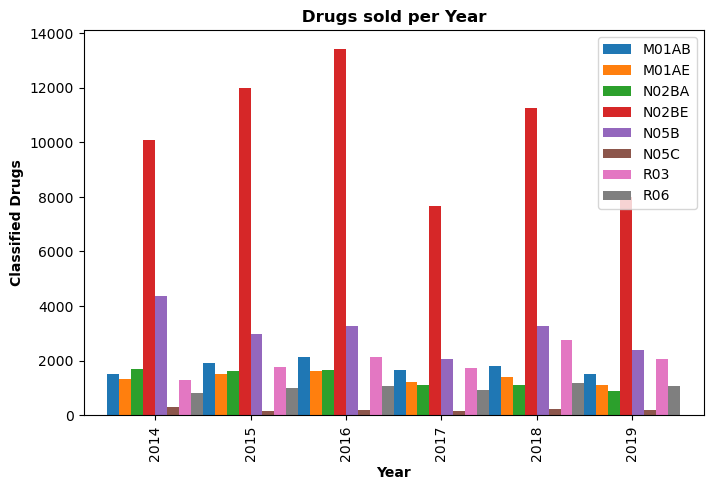

In [15]:
# total count for med sold per year
# RUPAL FINISH GRAPH
pharma_monthly_df['Year'] = pd.DatetimeIndex(pharma_monthly_df['datum']).year
yearly_df = pharma_monthly_df.groupby('Year').sum()
yearly_df.reset_index(0)
yearly_df

yearly_df.plot(kind='bar',figsize=(8,5), width=1)


plt.title(label=' Drugs sold per Year ', fontweight = 'bold')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Classified Drugs', fontweight = 'bold')
# plt.savefig("../Images/avg_temp.png")

plt.show()

plt.close()

Looking at the graph we can see that the drug category N02BE is the highest selling drug compared to all other categories. It can be predicted that N02BE is 


C:\Users\rupal\AppData\Local\Temp\ipykernel_17748\2336207969.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  sorted_total_df = total_df.sort_values((0), ascending=False)


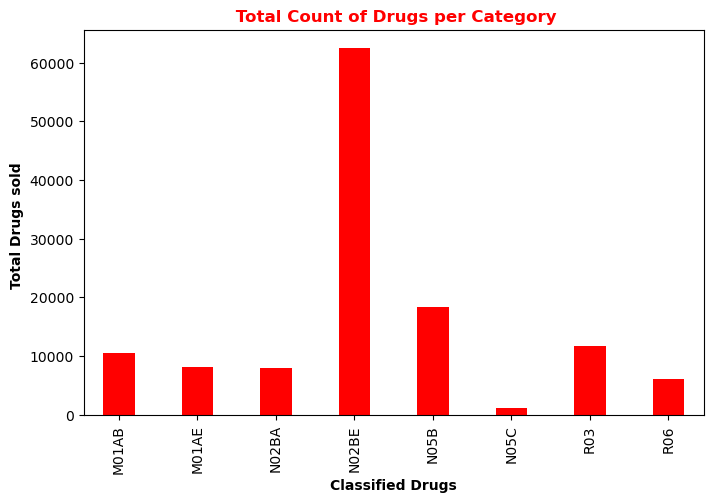

In [6]:
total_df = pharma_monthly_df.iloc[:,1:9].sum(axis=0)

sorted_total_df = total_df.sort_values((0), ascending=False)

plot_total_df = total_df.plot(kind='bar',color="Red",figsize=(8,5),width=0.4)

plot_total_df.set_title(label=' Total Count of Drugs per Category',color ="Red",fontweight = 'bold')
plot_total_df.set_xlabel('Classified Drugs', fontweight = 'bold')
plot_total_df.set_ylabel('Total Drugs sold ', fontweight = 'bold')

plt.show()
plt.close()


## Highest selling Drug Category ( N02BE)
 We can see that the drug category N02BE is the highest selling drug . Even though the sales count was low in 2014, the sales went up in 2016 and then again in 2017 it went back down and up again in 2018. We can analyze that even the sales had its own peak and off peak time , still N02BE was the highest selling drug through out all 6 years with sales count between 7000-14000 drugs sold.


C:\Users\rupal\AppData\Local\Temp\ipykernel_17748\4144917046.py:7: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  sorted_total_df = total_df.sort_values((0), ascending=False)


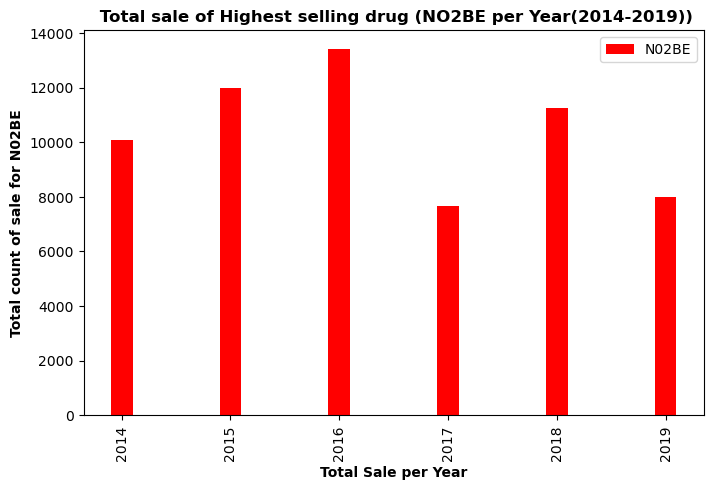

In [7]:
# Get the name of the highest selling drug
# which we will use to then plot that drug by year
# to find its performance

# Highest selling drug key
highest_selling_drug = sorted_total_df.keys()[0]
sorted_total_df = total_df.sort_values((0), ascending=False)

list_of_cols = [highest_selling_drug, 'Year']
hsd_df = pharma_monthly_df.filter(list_of_cols)
hsd_plot_df = hsd_df.groupby("Year").sum(0)
hsd_plot_df



x_axis =hsd_plot_df
y_axis = [highest_selling_drug, 'Year']
hsd_plot_df = hsd_plot_df.plot(kind='bar',color= "Red",figsize=(8,5),width=0.2)

hsd_plot_df.set_title(label=' Total sale of Highest selling drug (NO2BE per Year(2014-2019))', fontweight = 'bold')
hsd_plot_df.set_xlabel('Total Sale per Year', fontweight = 'bold')
hsd_plot_df.set_ylabel('Total count of sale for N02BE', fontweight = 'bold')



plt.show()
plt.close()





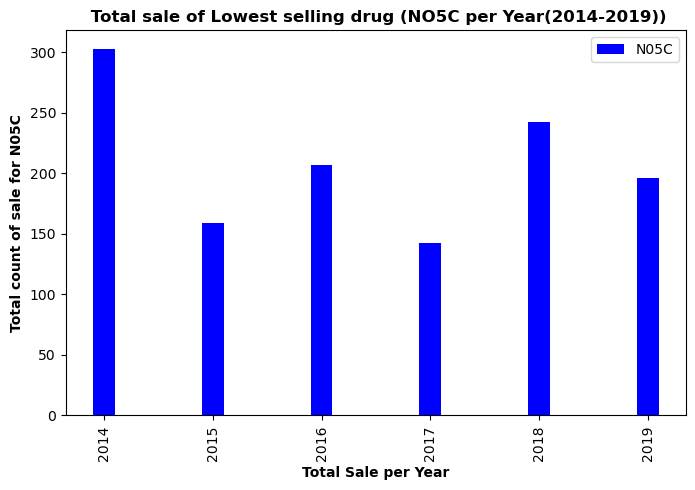

In [8]:
# plt.matshow(pharma_monthly_df.corr())
# plt.show()
lowest_selling_drug =sorted_total_df.keys()[7]

list_of_cols = [lowest_selling_drug, 'Year']
lsd_df = pharma_monthly_df.filter(list_of_cols)
lsd_plot_df = lsd_df.groupby("Year").sum(0)
lsd_plot_df



x_axis =hsd_plot_df
y_axis = [lowest_selling_drug, 'Year']
lsd_plot_df = lsd_plot_df.plot(kind='bar',color= "Blue",figsize=(8,5),width=0.2)

lsd_plot_df.set_title(label=' Total sale of Lowest selling drug (NO5C per Year(2014-2019))', fontweight = 'bold')
lsd_plot_df.set_xlabel('Total Sale per Year', fontweight = 'bold')
lsd_plot_df.set_ylabel('Total count of sale for N05C', fontweight = 'bold')



plt.show()
plt.close()
